# <font color=blue>Assignments for "Data Exploration - Multivariate Analysis"</font>

In this assignment, you will work on the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
PATH ='/content/drive/MyDrive/Colab Notebooks/Datajarlabs/6-Mastering_the_Exploratory_Data_Analysis'
os.chdir(PATH)

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**(1)** Does the performance in the exams vary according to gender, origin and education level of parents?

In [ ]:
print("Gender:")
display(df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().T)

print("\nRace/Ethnicity:")
display(df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean().T)

print("\nEducation level of parents:")
display(df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T)

Gender:


gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203



Race/Ethnicity:


race/ethnicity,group A,group B,group C,group D,group E
math score,61.629213,63.452632,64.463950,67.362595,73.821429
reading score,64.674157,67.352632,69.103448,70.030534,73.028571
writing score,62.674157,65.600000,67.827586,70.145038,71.407143



Education level of parents:


parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,67.882883,69.389831,62.137755,69.745763,67.128319,63.497207
reading score,70.927928,73.000000,64.704082,75.372881,69.460177,66.938547
writing score,69.896396,73.381356,62.448980,75.677966,68.840708,64.888268


In [ ]:
import seaborn as sns

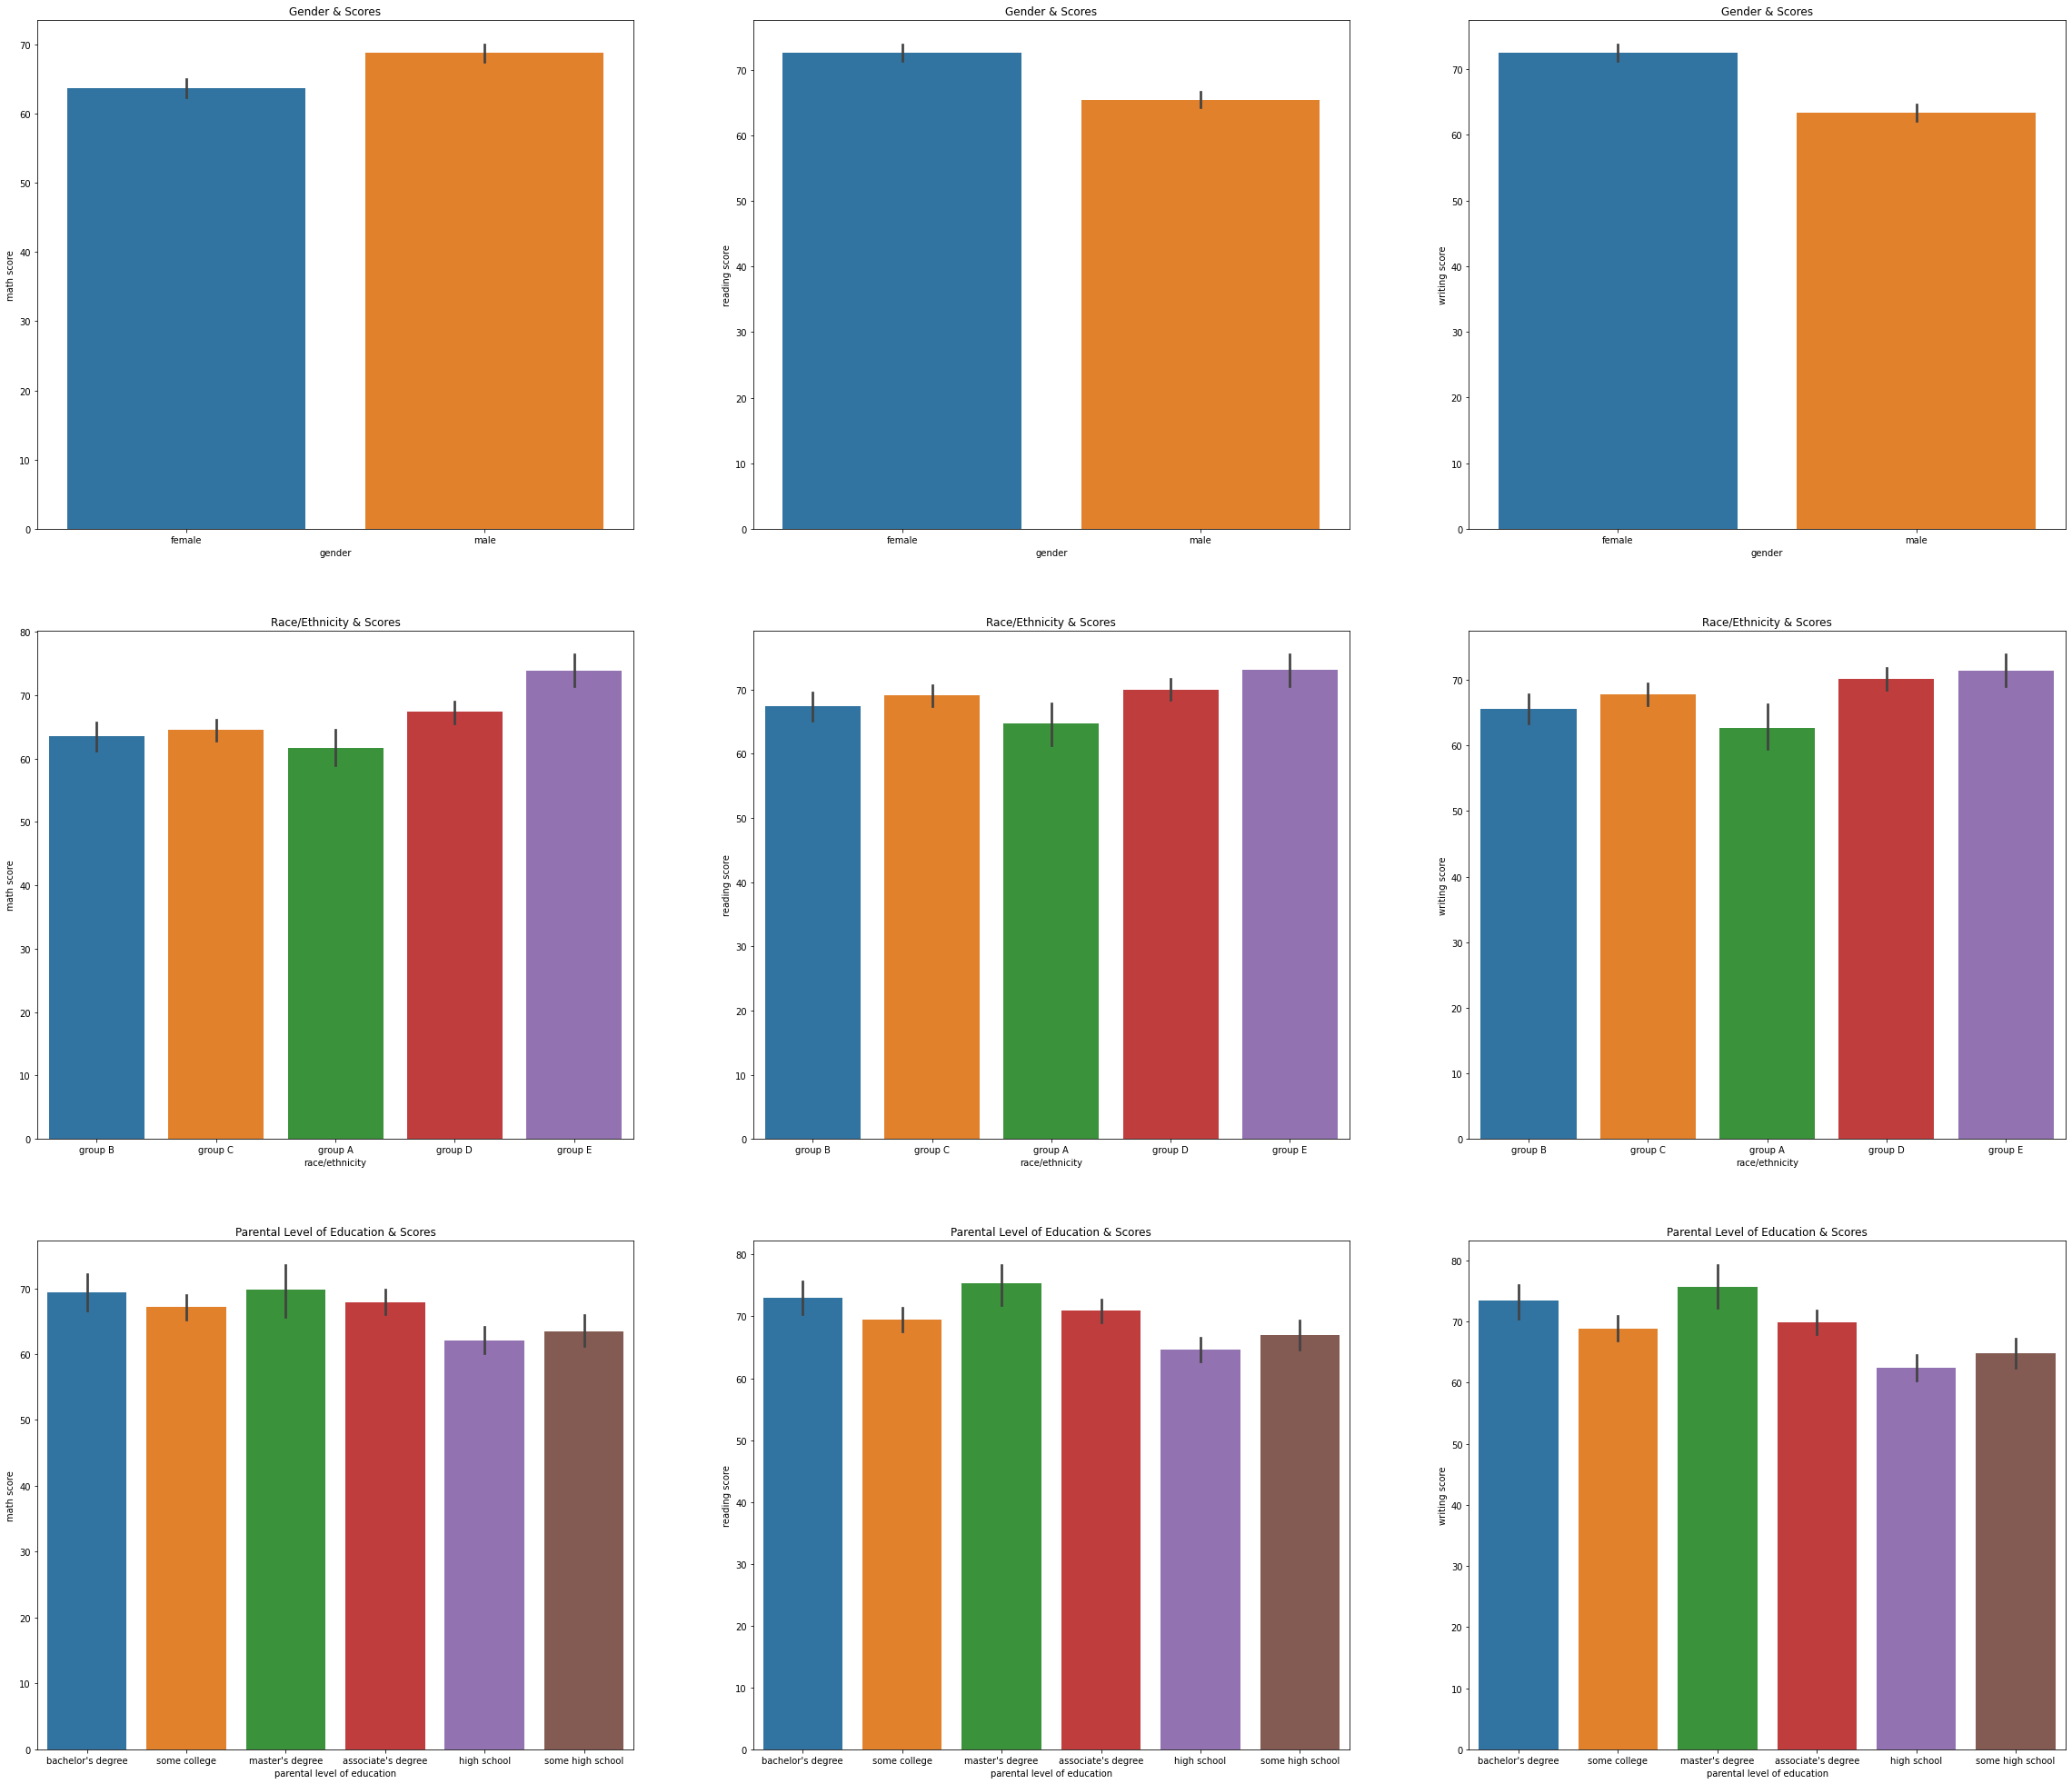

In [ ]:
plt.figure(figsize=(40,35))

scores = [df['math score'], df['reading score'], df['writing score']]

for i in range(3):
    plt.subplot(3, 3, i+1)
    sns.barplot(x='gender', y=scores[i], data=df)
    plt.title('Gender & Scores')

for i in range(3):
    plt.subplot(3, 3, i+4)
    sns.barplot(x='race/ethnicity', y=scores[i], data=df)
    plt.title('Race/Ethnicity & Scores')

for i in range(3):
    plt.subplot(3, 3, i+7)
    sns.barplot(x='parental level of education', y=scores[i], data=df)
    plt.title('Parental Level of Education & Scores')

plt.show()

**(2)** Does lunch type have a relationship with exam performances? How can you explain this, if any?

In [ ]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().T

lunch,free/reduced,standard
math score,58.921127,70.034109
reading score,64.653521,71.654264
writing score,63.022535,70.823256


In [ ]:
df.groupby('lunch')[['math score', 'reading score', 'writing score']].sum().T

lunch,free/reduced,standard
math score,20917,45172
reading score,22952,46217
writing score,22373,45681


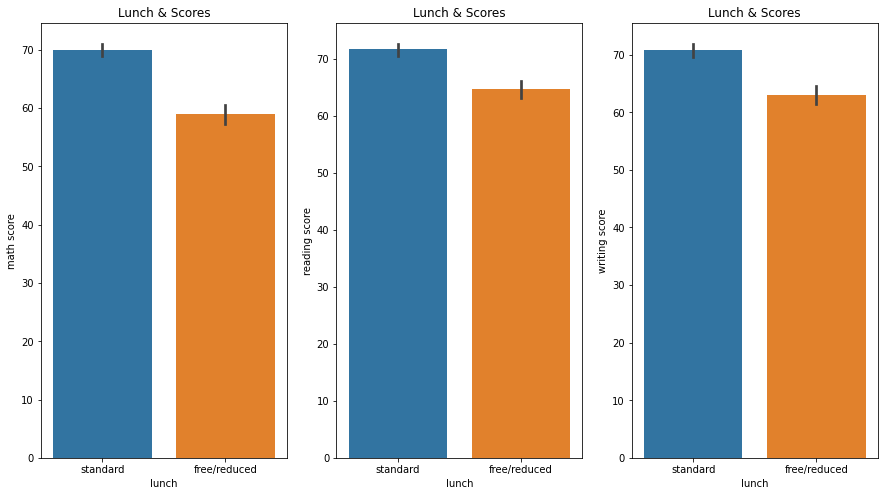

In [ ]:
plt.figure(figsize=(15,8))

scores = [df['math score'], df['reading score'], df['writing score']]

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='lunch', y=scores[i], data=df)
    plt.title('Lunch & Scores')

plt.show()

**(3)** Does the preparation courses have an impact on exam performance?

In [ ]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T

test preparation course,completed,none
math score,69.695531,64.077882
reading score,73.893855,66.534268
writing score,74.418994,64.504673


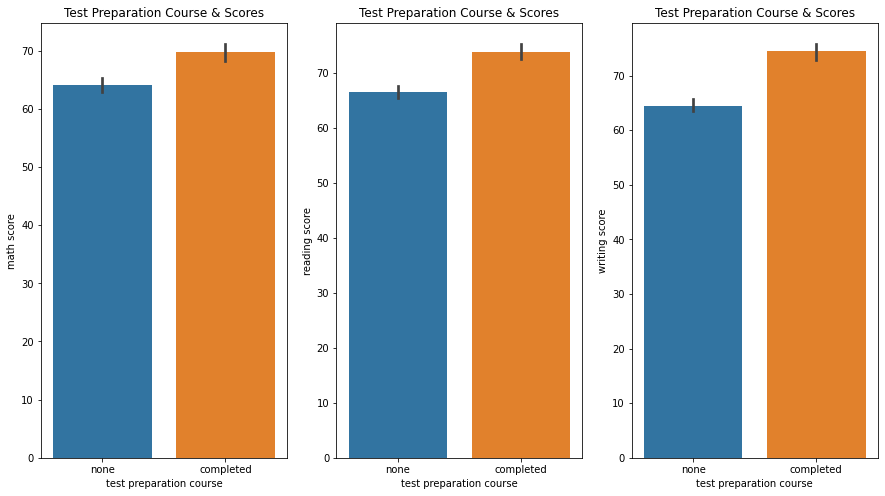

In [ ]:
plt.figure(figsize=(15,8))

scores = [df['math score'], df['reading score'], df['writing score']]

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='test preparation course', y=scores[i], data=df)
    plt.title('Test Preparation Course & Scores')

plt.show()

**(4)** Which lessons are most correlated with each other?

In [ ]:
df['total_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

In [ ]:
df.corr()

,math score,reading score,writing score,total_score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total_score,0.918746,0.970331,0.965667,1.000000


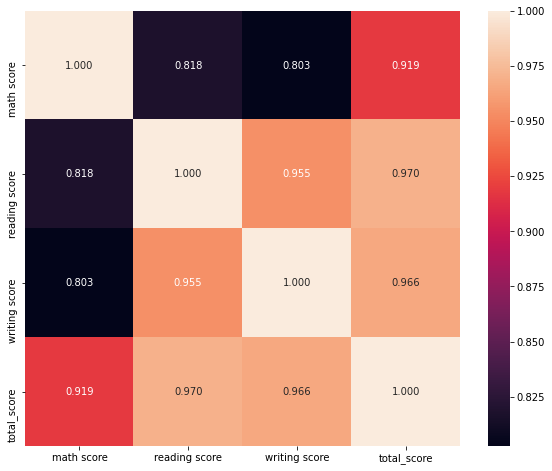

In [ ]:
# correlation between numerical features
plt.figure(figsize=(10, 8))
feature_corr = df.corr()
sns.heatmap(feature_corr, annot=True, square=True,annot_kws={'size': 10}, fmt='.3f',cbar=True)

plt.show()